In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
import h5py
import scipy
import cv2
import glob

c:\users\arnau.quera-bofarull\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dataset = h5py.File('database_200.hdf5')

In [3]:
print(list(dataset.keys()))

['test_img', 'test_label', 'train_img', 'train_label', 'val_img', 'val_label']


In [4]:
images = dataset['train_img']
targets = dataset['train_label']
targets = np.argmax(targets, axis = -1)


In [5]:
def order_labels(labels_image):
    pixels_0_indices = np.argwhere(labels_image == 0)
    pixels_1_indices = np.argwhere(labels_image == 1)
    pixels_2_indices = np.argwhere(labels_image == 2)

    p0_mean = np.mean(image[pixels_0_indices])
    p1_mean = np.mean(image[pixels_1_indices])
    p2_mean = np.mean(image[pixels_2_indices])
    mean_values = np.asarray([p0_mean, p1_mean, p2_mean])
    
    new_labels = np.argsort(mean_values)
    new_labels_array = np.zeros(image[...,0].shape)
    new_labels_array[labels_image == new_labels[0]] = 1
    new_labels_array[labels_image == new_labels[1]] = 2
    new_labels_array[labels_image == new_labels[2]] = 0
    
    return new_labels_array


In [14]:
def compute_accuracy(labeled,target):
    total_pixels = np.size(labeled)
    total_difference = labeled-target
    correct_pixels = len(np.argwhere( total_difference == 0))
    print("Total accuracy is %.2f " %(correct_pixels / total_pixels * 100))
    
    #soft_tissue_prediction = labeled - 1
    #st_number = len(np.argwhere(soft_tissue_prediction == 0))
    #st_correct_number = len(np.argwhere(target == 1))
    #print("Soft tissue accuracy: %.2f " %( 100 * st_number / st_correct_number))
    #false_positives = [ labeled == 1 and target !=1]
    #print(false_positives)
    #print("False soft tissue positives = %d" %false_positives)
    
    

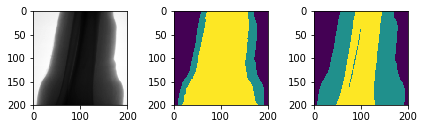

Total accuracy is 51.13 


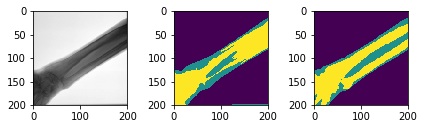

Total accuracy is 87.41 


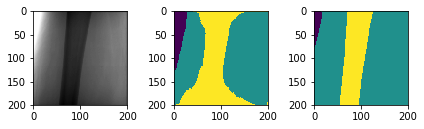

Total accuracy is 11.84 


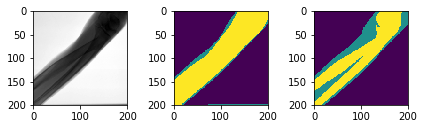

Total accuracy is 69.57 


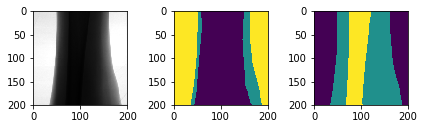

Total accuracy is 19.87 


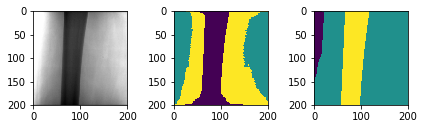

Total accuracy is 8.42 


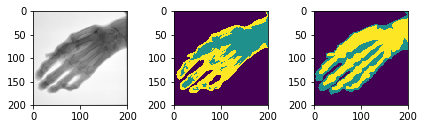

Total accuracy is 81.83 


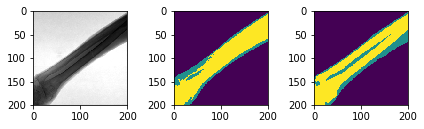

Total accuracy is 4.29 


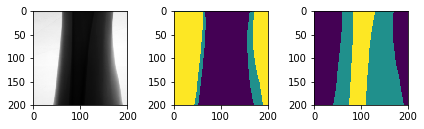

Total accuracy is 1.51 


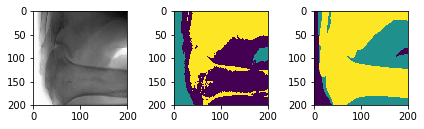

Total accuracy is 21.67 


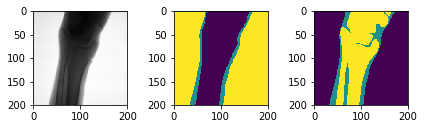

Total accuracy is 64.46 


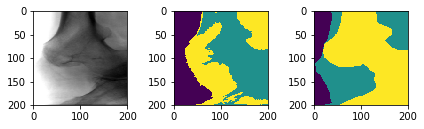

Total accuracy is 27.91 


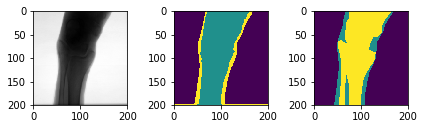

Total accuracy is 1.92 


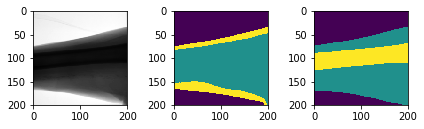

Total accuracy is 2.01 


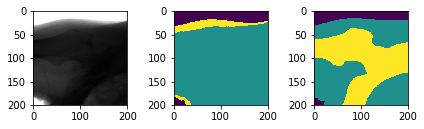

Total accuracy is 51.20 


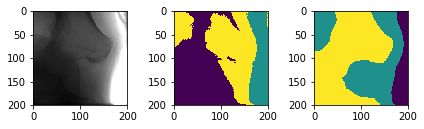

Total accuracy is 23.84 


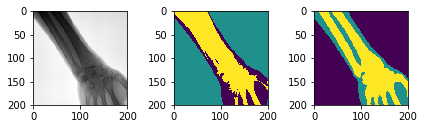

Total accuracy is 64.95 


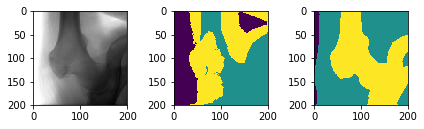

Total accuracy is 25.64 


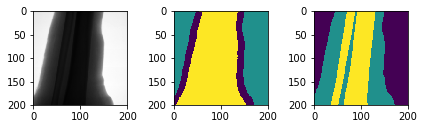

Total accuracy is 1.15 


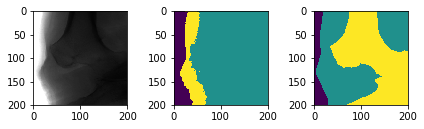

Total accuracy is 4.92 


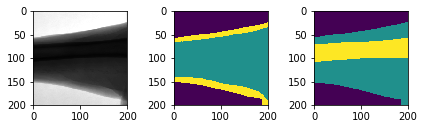

Total accuracy is 1.39 


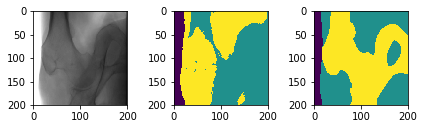

Total accuracy is 36.25 


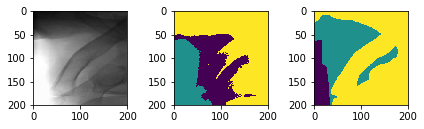

Total accuracy is 22.23 


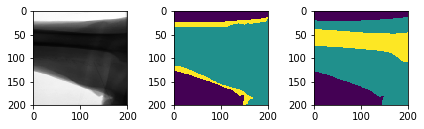

Total accuracy is 42.73 


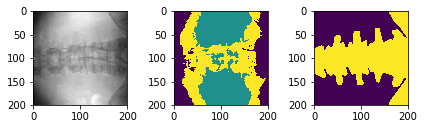

Total accuracy is 45.93 


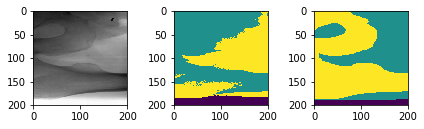

Total accuracy is 15.87 


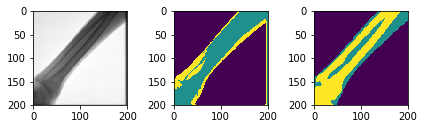

Total accuracy is 86.62 


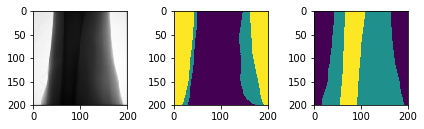

Total accuracy is 1.75 


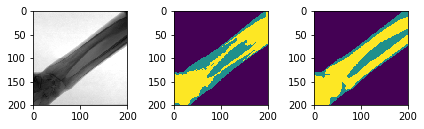

Total accuracy is 70.22 


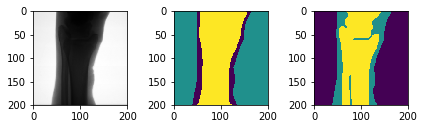

Total accuracy is 59.32 


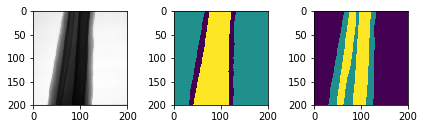

Total accuracy is 66.95 


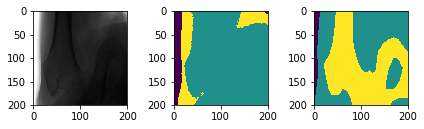

Total accuracy is 3.67 


In [15]:
k_means = cluster.KMeans(n_clusters=3, n_jobs = -1)
for k, image in enumerate(images):
    image_pixels = np.zeros(200*200)
    image_flat = np.reshape(image, 200*200)
    for i, pixel in enumerate(image_flat):
        image_pixels[i] = np.rint(255*pixel)
    image_pixels = image_pixels.reshape(-1, 1)
    k_means.fit(image_pixels)
    labels = k_means.labels_
    fig, ax = plt.subplots(1,3)
    ax[0].imshow(image[...,0], cmap = 'gray')
    labels_image = labels.reshape((200,200))
    labels_new = order_labels(labels_image)
    ax[1].imshow(labels_new)
    ax[2].imshow(targets[k])
    plt.tight_layout()
    plt.show()
    compute_accuracy(labels_image, targets[k])

    

In [10]:
difference = labels_image - targets[k]

20454